In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil import parser

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.dates as mdates

import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./goldstock.csv')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.set_index('Date', inplace=True)

In [7]:
df

,Close,Volume,Open,High,Low
Date,,,,,
2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...
2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1400x700 with 0 Axes>

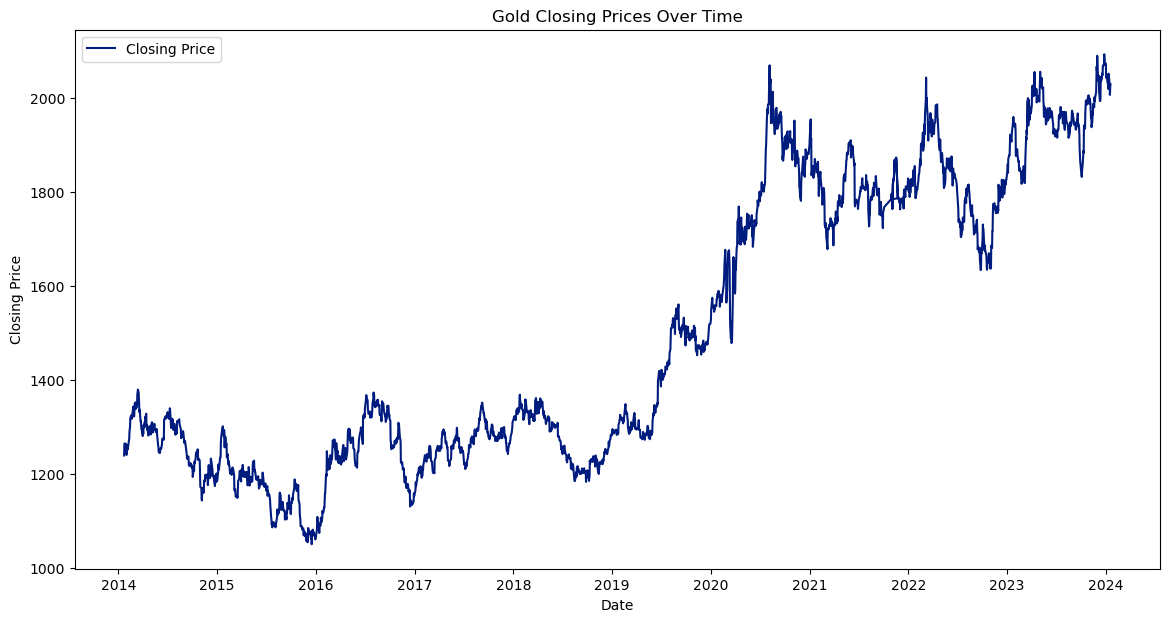

In [8]:
# Checking available styles
print(plt.style.available)

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### ARIMA

In [11]:
# Split the data into train and test sets
train = df['Close'][:int(0.8 * len(df))]
test = df['Close'][int(0.8 * len(df)):]

In [13]:
train

Date
2024-01-19    2029.3
2024-01-18    2021.6
2024-01-17    2006.5
2024-01-16    2030.2
2024-01-12    2051.6
               ...  
2016-01-27    1116.3
2016-01-26    1120.6
2016-01-25    1105.3
2016-01-22    1096.3
2016-01-21    1098.2
Name: Close, Length: 2008, dtype: float64

In [14]:
test

Date
2016-01-20    1106.2
2016-01-19    1089.1
2016-01-15    1090.7
2016-01-14    1073.6
2016-01-13    1087.1
               ...  
2014-01-28    1250.5
2014-01-27    1263.5
2014-01-24    1264.5
2014-01-23    1262.5
2014-01-22    1238.6
Name: Close, Length: 503, dtype: float64

In [12]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [16]:
forecast = model_fit.forecast(steps=len(test))
forecast

2008    1097.667285
2009    1097.881856
2010    1098.131309
2011    1098.001828
2012    1098.034889
           ...     
2506    1098.027802
2507    1098.027802
2508    1098.027802
2509    1098.027802
2510    1098.027802
Name: predicted_mean, Length: 503, dtype: float64

In [17]:
forecast.index

RangeIndex(start=2008, stop=2511, step=1)

In [18]:
test.index

DatetimeIndex(['2016-01-20', '2016-01-19', '2016-01-15', '2016-01-14',
               '2016-01-13', '2016-01-12', '2016-01-11', '2016-01-08',
               '2016-01-07', '2016-01-06',
               ...
               '2014-02-04', '2014-02-03', '2014-01-31', '2014-01-30',
               '2014-01-29', '2014-01-28', '2014-01-27', '2014-01-24',
               '2014-01-23', '2014-01-22'],
              dtype='datetime64[ns]', name='Date', length=503, freq=None)